## ***DATA DESCRIPTION***




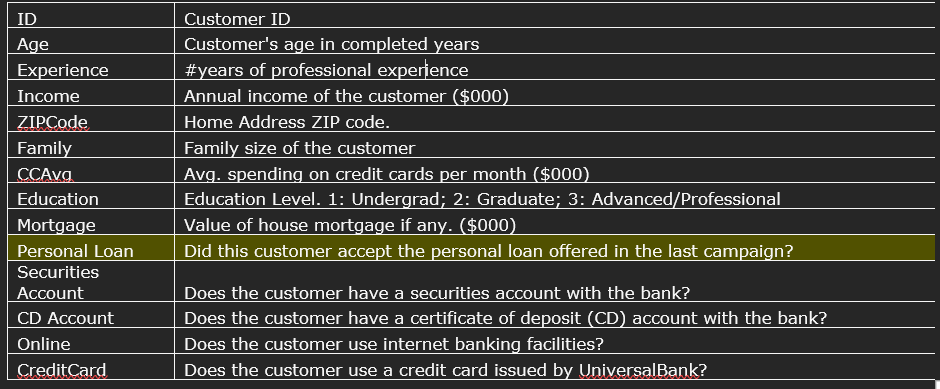***

### This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns to better target marketing to increase the success ratio with a minimal budget.

# **Problem statement**

### The department wants to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
data = pd.read_excel(r"C:\Users\AVIRAL\Loan Srudy\Data.xlsx")

In [3]:
data.head(2)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [6]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

###1. Summarize important observations from the data set.
  
- a. Find out number of rows; no. & types of variables (continuous, categorical
etc.)

In [7]:
print(f'''The Number of Rows in the dataset are {data.shape[0]}
The Number of Columns in the dataset are {data.shape[1]}''')

The Number of Rows in the dataset are 5000
The Number of Columns in the dataset are 14


In [8]:
# Lets Make ID column as index as it is only the unique identifier

data.set_index('ID', inplace = True)

In [9]:
data['Age'].unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23], dtype=int64)

In [10]:
# Lets bin the age as it has many unique values

data['Age'] = data['Age'].apply(lambda x : '20-30' if x <= 30 else '30-40' if x <= 40 else '40-50' if x <= 50\
                  else '50-60' if x <= 60 else '60-70')

In [11]:
data['Age'].unique()

array(['20-30', '40-50', '30-40', '50-60', '60-70'], dtype=object)

In [12]:
# Lets convert data into numeric columns and categorical columns

num_cols = [ 'Experience', 'Income', 'CCAvg', 'Mortgage']

cat_cols = ['Age', 'Family', 'Education', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']

- b.  Calculate five-point summary for numerical variables



In [13]:
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0




* Mortgage column can have outliers
* Income column can also have outliers
* Experience column have -3 as experience which does not make any sense
* CCAvg column can also have outliers also



c. Summarize observations for categorical variables – no. of categories, %
observations in each category


In [14]:
data[cat_cols].count()

Age                   5000
Family                5000
Education             5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

In [15]:
for i in cat_cols:
 print(data[i].value_counts(normalize = True)*100,'\n')

Age
50-60    26.46
40-50    25.40
30-40    24.72
20-30    12.48
60-70    10.94
Name: proportion, dtype: float64 

Family
1    29.44
2    25.92
4    24.44
3    20.20
Name: proportion, dtype: float64 

Education
1    41.92
3    30.02
2    28.06
Name: proportion, dtype: float64 

Personal Loan
0    90.4
1     9.6
Name: proportion, dtype: float64 

Securities Account
0    89.56
1    10.44
Name: proportion, dtype: float64 

CD Account
0    93.96
1     6.04
Name: proportion, dtype: float64 

Online
1    59.68
0    40.32
Name: proportion, dtype: float64 

CreditCard
0    70.6
1    29.4
Name: proportion, dtype: float64 



#### 2. Check for defects in the data. Perform necessary actions to ‘fix’ these defects.

- a. Do variables have missing/null values?


In [16]:
data.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Hence it does not have any null values

- b. Do variables have outliers?

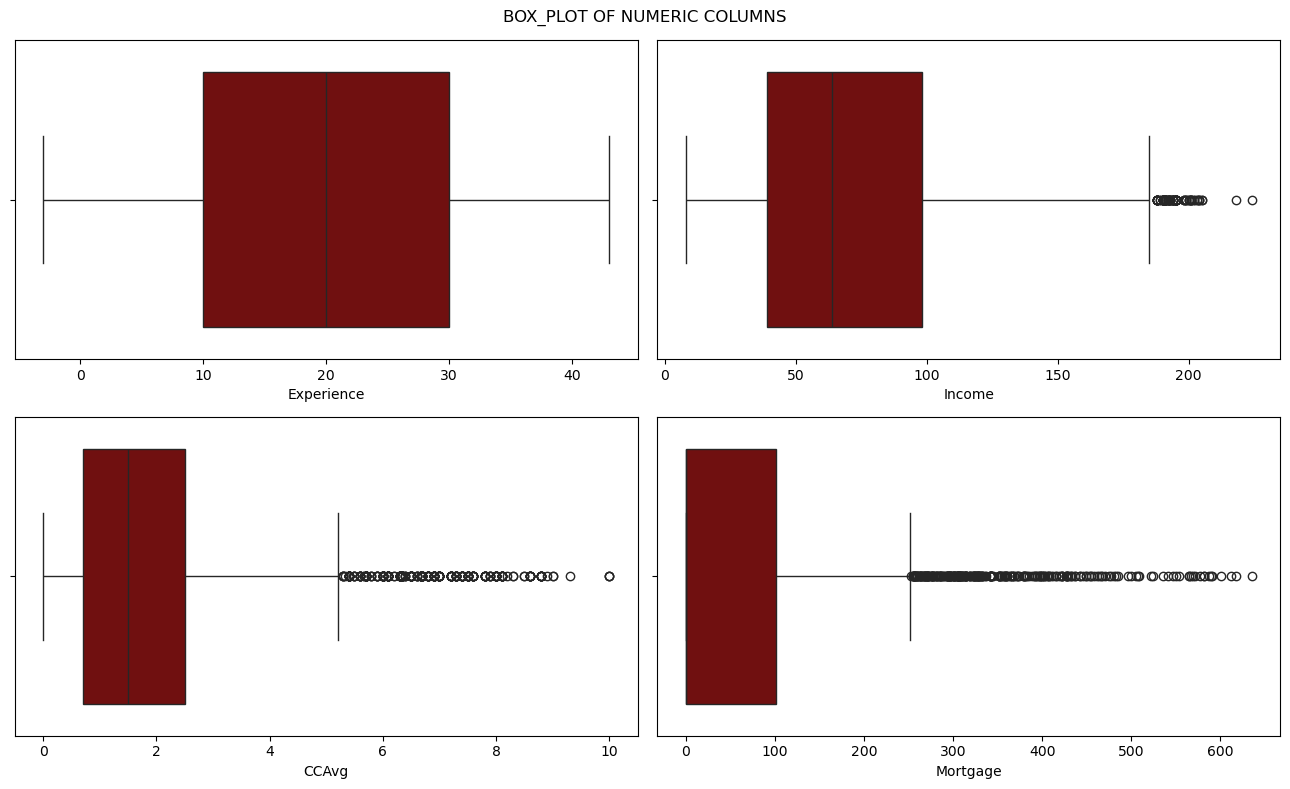

In [17]:
plt.figure(figsize=(13,8))
plt.suptitle('BOX_PLOT OF NUMERIC COLUMNS')
t = 1
for i in num_cols:
  plt.subplot(2,2,t)
  sns.boxplot(data= data, x = i, color = 'maroon')
  t = t+1

plt.tight_layout()
plt.show()



*  Exprience COlumn does not have any outlier
*  CCAvg, Mortgage, Income Columns have positive Outliers
* We will keep outliers here as removal of them will result in affected performance of model as they might be beneficial in real world data



- c. Is the Target distributed evenly? Is it a defect? If Yes, what steps are
being taken to rectify the problem.

<Axes: xlabel='Personal Loan'>

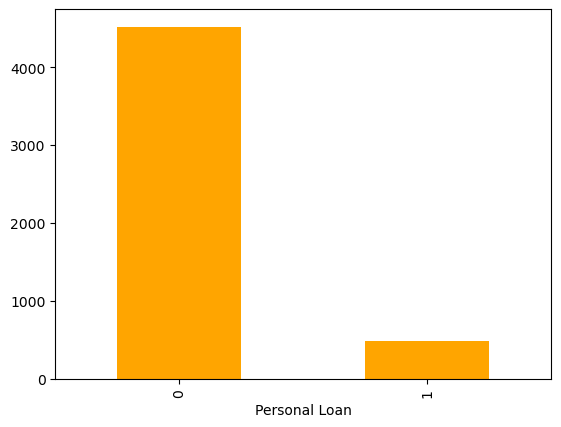

In [18]:
data['Personal Loan'].value_counts().plot(kind = 'bar', color = 'orange')

<Axes: ylabel='proportion'>

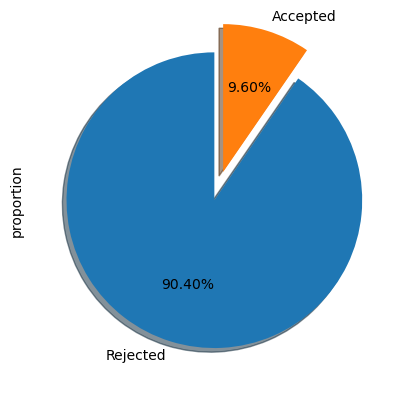

In [19]:
# Let see it in pie chart

data['Personal Loan'].value_counts(normalize=True).plot(kind = 'pie', startangle = 90, autopct = '%.2f%%',\
                                                        labels = ['Rejected', 'Accepted'], shadow = True, explode = [0,0.2])

Here no. of accepted is very less as compared to no. of rejected so i am going to use SMOTE technique in further operations

#### 3. Summarize relationships among variables.
- a. Plot relevant categorical plots. Find out which are the variables most
correlated or appear to be in causation with Target? Do you want to exclude some
variables from the model based on this analysis? What other actions will you
take?


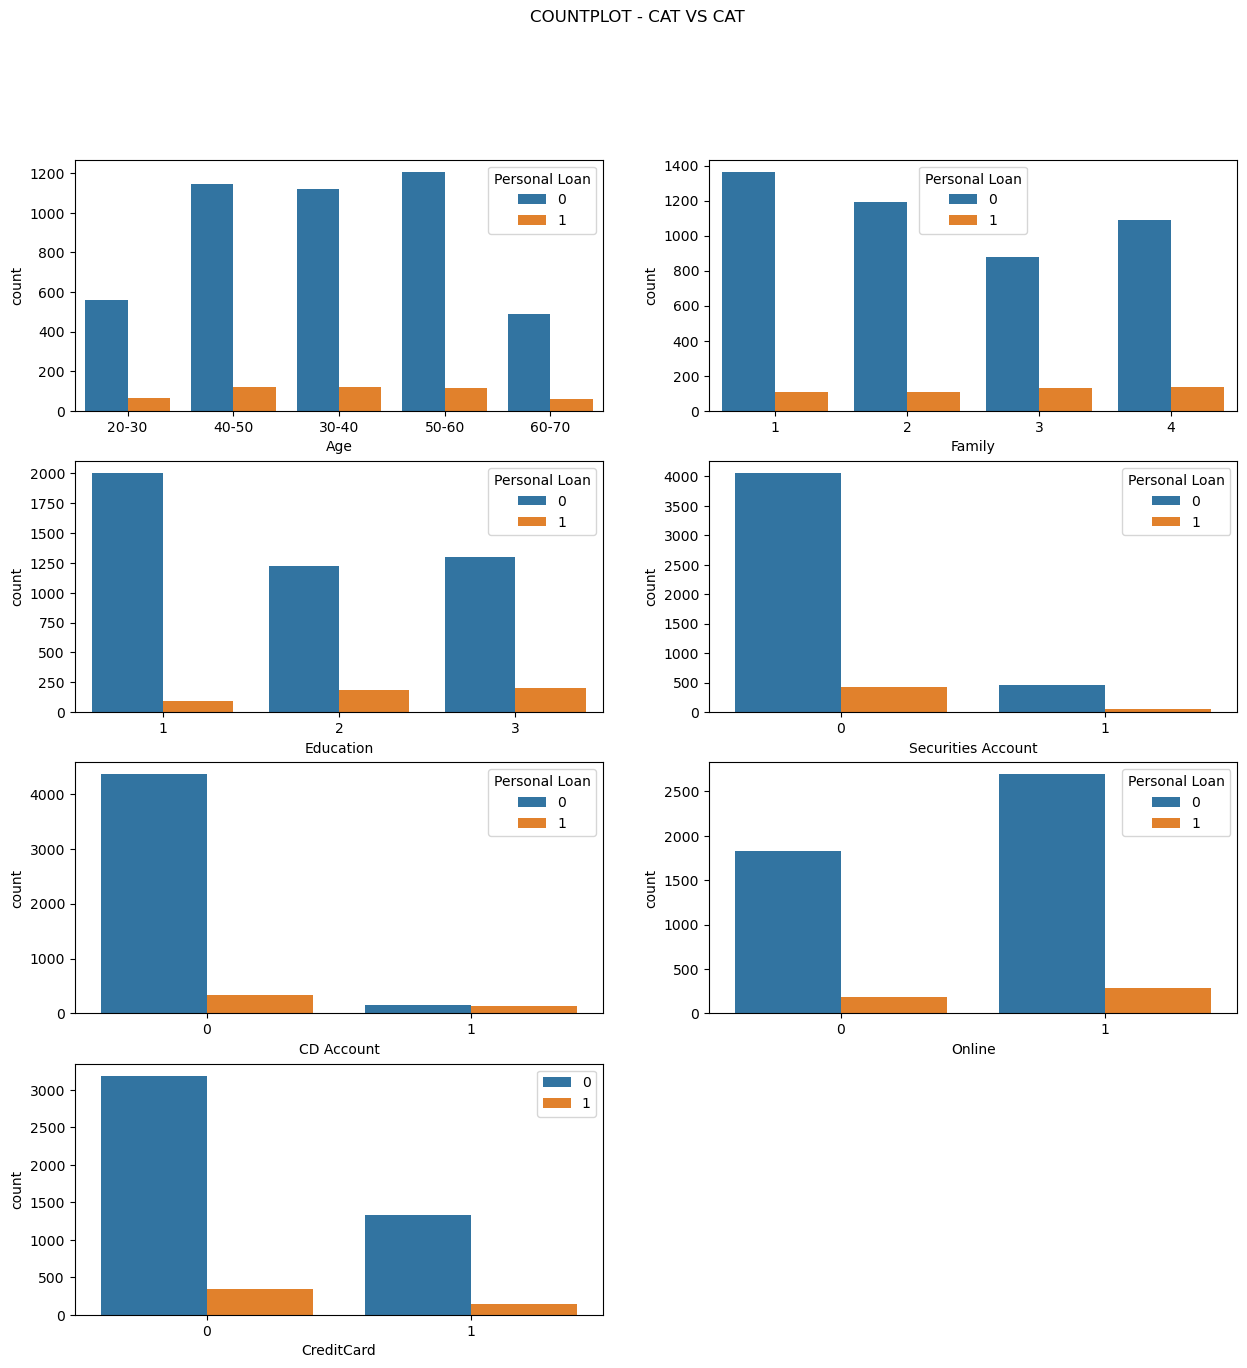

In [20]:
t = 1
plt.figure(figsize = (15,15))
plt.suptitle('COUNTPLOT - CAT VS CAT')
for i in cat_cols:
  if i != 'Personal Loan':
    plt.subplot(4,2,t)
    sns.countplot(data = data, x = i, hue = 'Personal Loan')
    t = t+1
plt.legend()
plt.tight_layout
plt.show()

In [21]:
from scipy.stats import chi2_contingency

In [22]:
dataframe = pd.DataFrame(columns = ['P-Values'])
for i in cat_cols:
  contingency = pd.crosstab(data[i], data['Personal Loan'])
  chi2, p, _, _ = chi2_contingency(contingency)
  dataframe.loc[i] = p
dataframe[dataframe['P-Values'] > 0.05]

,P-Values
Age,0.586168
Securities Account,0.140515
Online,0.692860
CreditCard,0.884386


Here are the columns that are not significant in model building as they accept the null hypothesis of not significance names are -

1.   Age
2.   Securities Account
3. Online
4. CreditCArd



In [23]:
df = pd.DataFrame(columns = ['P Values'])
for i in cat_cols:
  contingency_tab = pd.crosstab(data[i], data['Personal Loan'])
  chi2, pval, _ ,_ = chi2_contingency(contingency_tab)
  df.loc[i] = pval

df[df['P Values'] < 0.05]

,P Values
Family,1.614412e-06
Education,6.991474e-25
Personal Loan,0.000000e+00
CD Account,7.398298e-110


here are the columns which have pvalue less than 0.05 which reject the null hypo of no relation so these columns play a significance role in model building name of these columns are  

1.   Family
2.   Education
3. Personal loan
4. CD account



So we will remove the columns that are not significant at the time of train test split

- b. Plot all independent variables with the target & find out the relationship?
Perform the Relevant Tests to find out if the Independent variables are
associated with the Target Variable.


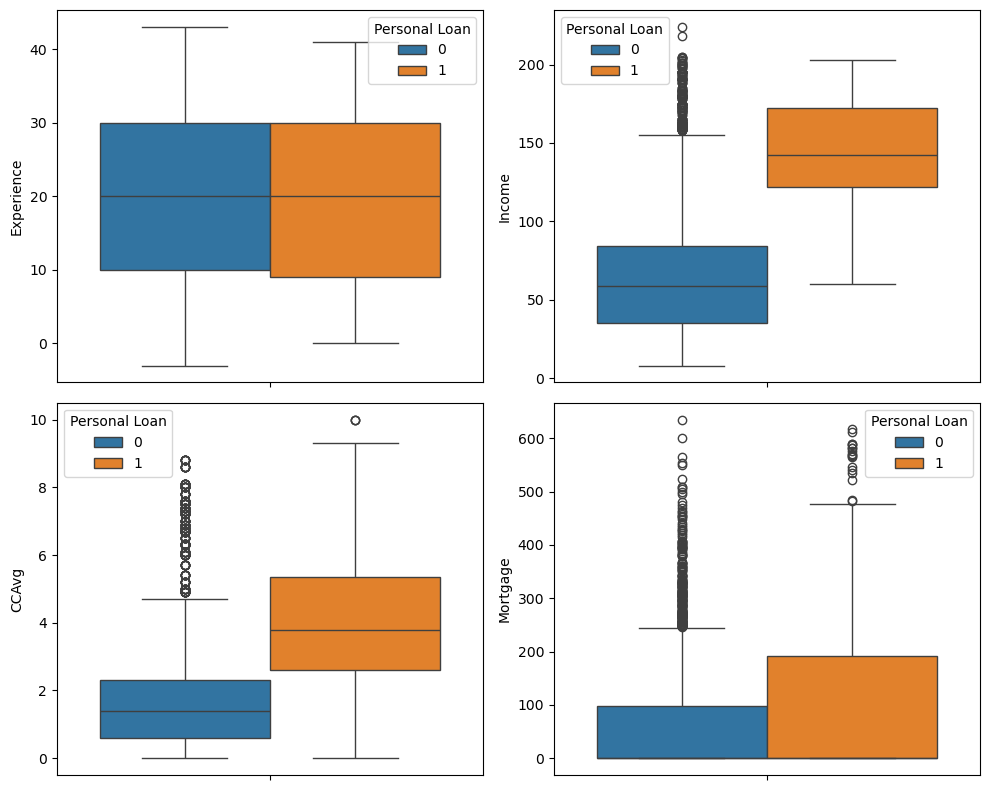

In [24]:
t = 1
plt.figure(figsize = (10,8))
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(data, y = i, hue = data['Personal Loan'])
    t+=1
plt.tight_layout()
plt.show()

In [25]:
from scipy.stats import ttest_ind

In [26]:
dataframe = pd.DataFrame(columns = ['P-VAlue'])
for i in num_cols:
  magic1 = data[data['Personal Loan']== 0][i]
  magic2 = data[data['Personal Loan']== 1][i]

  test, pval = ttest_ind(magic1, magic2)
  dataframe.loc[i] = pval

dataframe[dataframe['P-VAlue'] > 0.05]

,P-VAlue
Experience,0.600236


Here Experience is the unsignificant column so we will remove this at the time of train test splitting as it accepts the null hypo that columns have no relation

In [27]:
dframe = pd.DataFrame(columns = ['P-Value'])
for i in num_cols:
  magic1 = data[data['Personal Loan']== 0][i]
  magic2 = data[data['Personal Loan']== 1][i]

  test, pval = ttest_ind(magic1, magic2)
  dframe.loc[i] = pval

dframe[dframe['P-Value'] < 0.05]

,P-Value
Income,0.000000e+00
CCAvg,3.815684e-159
Mortgage,5.730342e-24


here all these variables have p value less than 0.05 so we should keep them in our model as we reject the null hypo as we have relations between the columns


## **Train-Test Split**

#### 4. Split dataset into train and test (70:30)
- a. Are both train and test representative of the overall data? How would you
ascertain this statistically?


In [28]:
new_data = ['Family',  'Education', 'Personal Loan','CD Account', 'CCAvg', 'Mortgage', 'Income']
df = data[new_data]

In [29]:
df.head(2)

,Family,Education,Personal Loan,CD Account,CCAvg,Mortgage,Income
ID,,,,,,,
1,4,1,0,0,1.6,0,49
2,3,1,0,0,1.5,0,34


In [30]:
# Let's split the column into train and test

X = data.drop(columns = 'Personal Loan')
y = data['Personal Loan']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state = 5, shuffle = True, test_size = 0.3)

In [33]:
print(f'''X-Train Size is {x_train.shape}
Y-Train Size is {y_train.shape}
X-Test Size is {x_test.shape}
Y-Test Size is {y_test.shape}''')

X-Train Size is (3500, 12)
Y-Train Size is (3500,)
X-Test Size is (1500, 12)
Y-Test Size is (1500,)


## **Model Building**

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import recall_score,classification_report, accuracy_score, f1_score, precision_score, confusion_matrix, cohen_kappa_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


#### 5. Fit a base model and explain the reason of selecting that model. Please write your key observations.

In [35]:
# Create a function to predict accuracy score , cohen kappa and all


m = [] # Model
acc = [] # Accuracy
pre = [] # Precision
kap = [] # cohen kappa
cf = [] # Confusion Matrix
rec = [] # Recall
f1 = [] # f1 score
def model_validation(model, xtrain, ytrain, xtest, ytest):
  mod = model
  mod.fit(xtrain, ytrain)
  soft_pred = mod.predict_proba(xtest)[:,1]
  hard_pred = mod.predict(xtest)


  print('confusion_matrix', '\n', confusion_matrix(ytest, hard_pred))
  print('cohen_kappa_score', '\n', round(cohen_kappa_score(ytest, hard_pred),2))
  print('classification_report', '\n', classification_report(ytest, hard_pred))


  plt.figure(figsize = (10,10))
  fpr, tpr, thre = roc_curve(ytest, soft_pred )
  plt.plot([0,1],[0,1], ls = '--', label = 'DIAGONAL', color = 'black')
  plt.plot(fpr, tpr, label = 'MODEL LINE', color = 'crimson')
  plt.title(f'ROC-AUC SCORE, {roc_auc_score(ytest, soft_pred)}')
  plt.legend()
  plt.tight_layout()
  plt.show()


  response = input('Heyyy Aviiii, Do you want to save this model ')
  if response.lower() == 'y':
    global scoreline
    m.append(str(model))
    acc.append(accuracy_score(ytest,hard_pred))
    pre.append(precision_score(ytest, hard_pred))
    rec.append(recall_score(ytest, hard_pred))
    f1.append(f1_score(ytest, hard_pred))
    kap.append(cohen_kappa_score(ytest, hard_pred))

    scoreline = pd.DataFrame({'MODEL' : m, 'ACCURACY' : acc, 'PRECISION' : pre, "RECALL" : rec,\
                             'F1 SCORE' : f1, 'COHEN KAPPA SCORE' : kap})

  else:
    return


In [36]:
# WE need to map age here
x_train['Age'].unique()

array(['30-40', '50-60', '60-70', '40-50', '20-30'], dtype=object)

In [37]:
map_dict = {'30-40' : 1, '50-60' : 3, '60-70' : 4, '40-50' : 2, '20-30' : 0}
x_train['Age'] = x_train['Age'].map(map_dict)
x_test['Age'] = x_test['Age'].map(map_dict)

In [38]:
x_train['Age'].unique()

array([1, 3, 4, 2, 0], dtype=int64)

confusion_matrix 
 [[1333   23]
 [  62   82]]
cohen_kappa_score 
 0.63
classification_report 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1356
           1       0.78      0.57      0.66       144

    accuracy                           0.94      1500
   macro avg       0.87      0.78      0.81      1500
weighted avg       0.94      0.94      0.94      1500



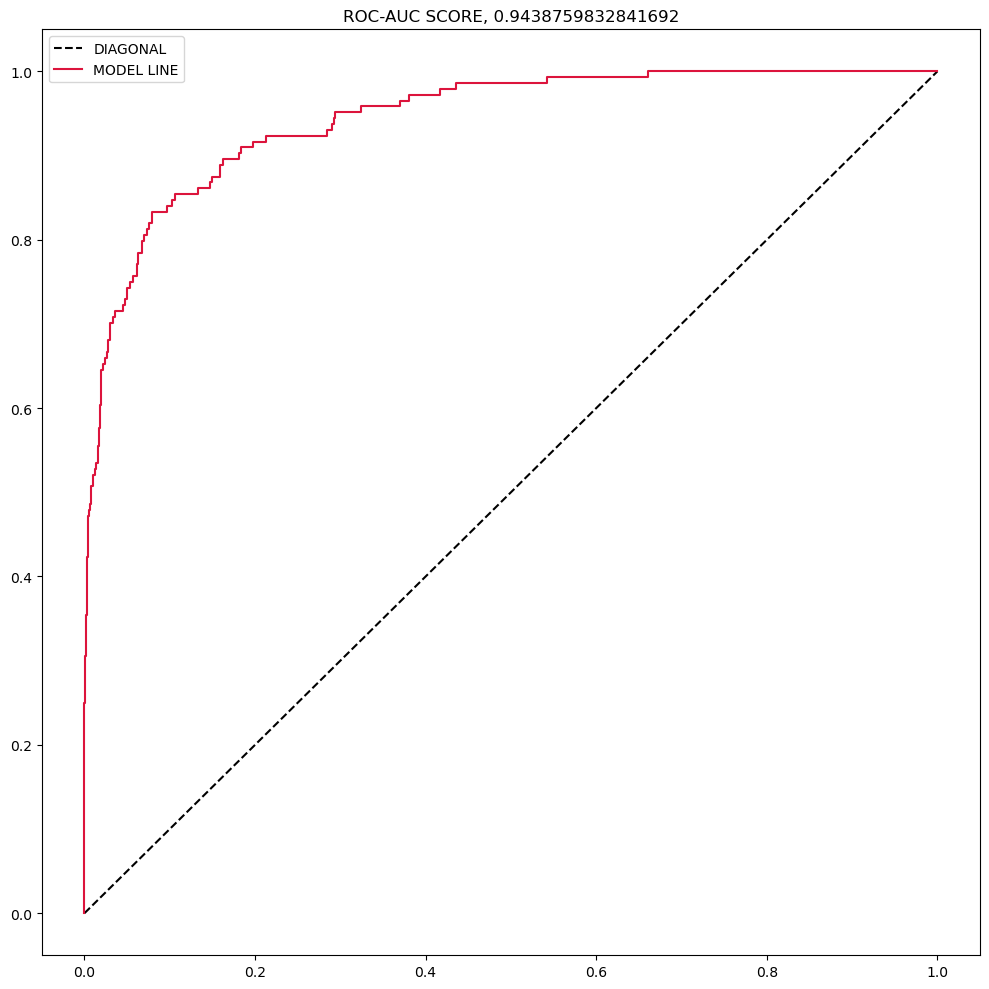

In [39]:
model_validation(model = LogisticRegression(), xtrain = x_train, ytrain = y_train, xtest = x_test, ytest = y_test)

In [40]:
scoreline

,MODEL,ACCURACY,PRECISION,RECALL,F1 SCORE,COHEN KAPPA SCORE
0,LogisticRegression(),0.943333,0.780952,0.569444,0.658635,0.628561


confusion_matrix 
 [[1346   10]
 [  19  125]]
cohen_kappa_score 
 0.89
classification_report 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.93      0.87      0.90       144

    accuracy                           0.98      1500
   macro avg       0.96      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500



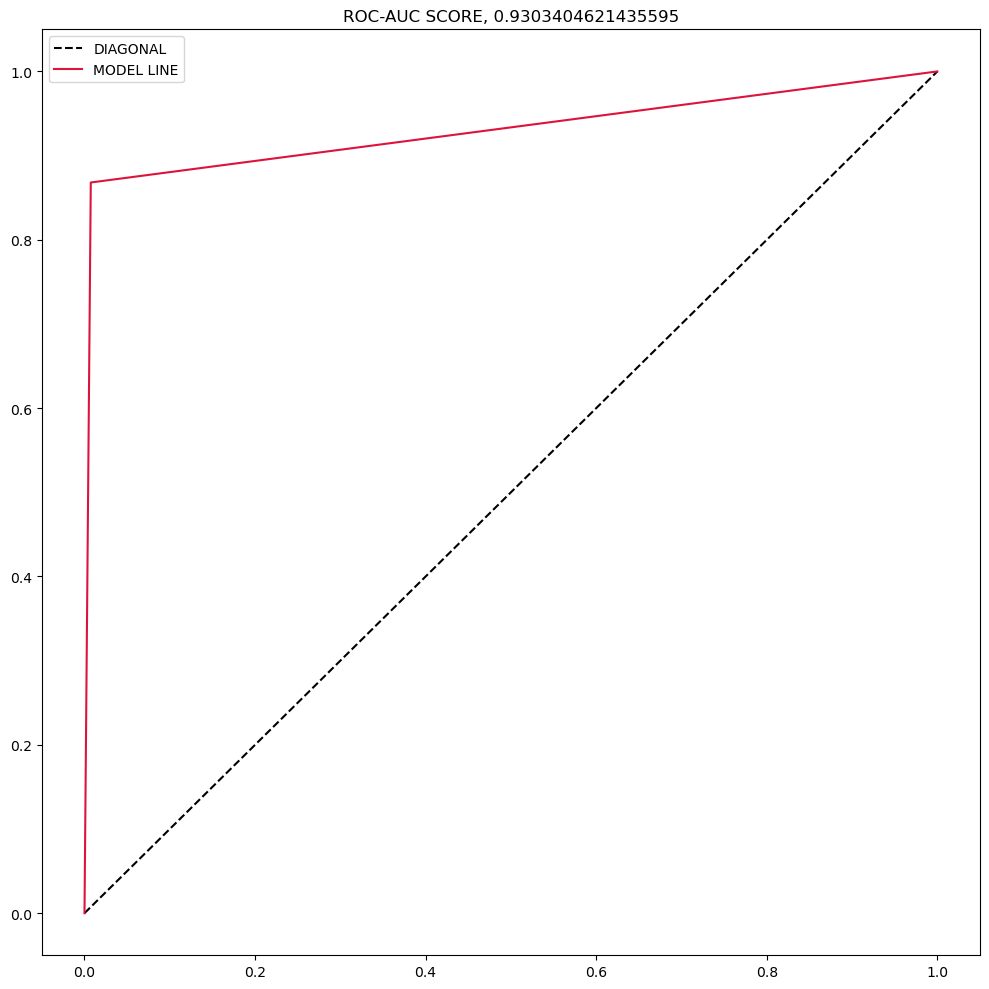

In [41]:
model_validation(DecisionTreeClassifier(class_weight='balanced'), x_train, y_train, x_test, y_test)

In [42]:
scoreline

,MODEL,ACCURACY,PRECISION,RECALL,F1 SCORE,COHEN KAPPA SCORE
0,LogisticRegression(),0.943333,0.780952,0.569444,0.658635,0.628561
1,DecisionTreeClassifier(class_weight='balanced'),0.980667,0.925926,0.868056,0.896057,0.885412


confusion_matrix 
 [[1318   38]
 [ 117   27]]
cohen_kappa_score 
 0.21
classification_report 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      1356
           1       0.42      0.19      0.26       144

    accuracy                           0.90      1500
   macro avg       0.67      0.58      0.60      1500
weighted avg       0.87      0.90      0.88      1500



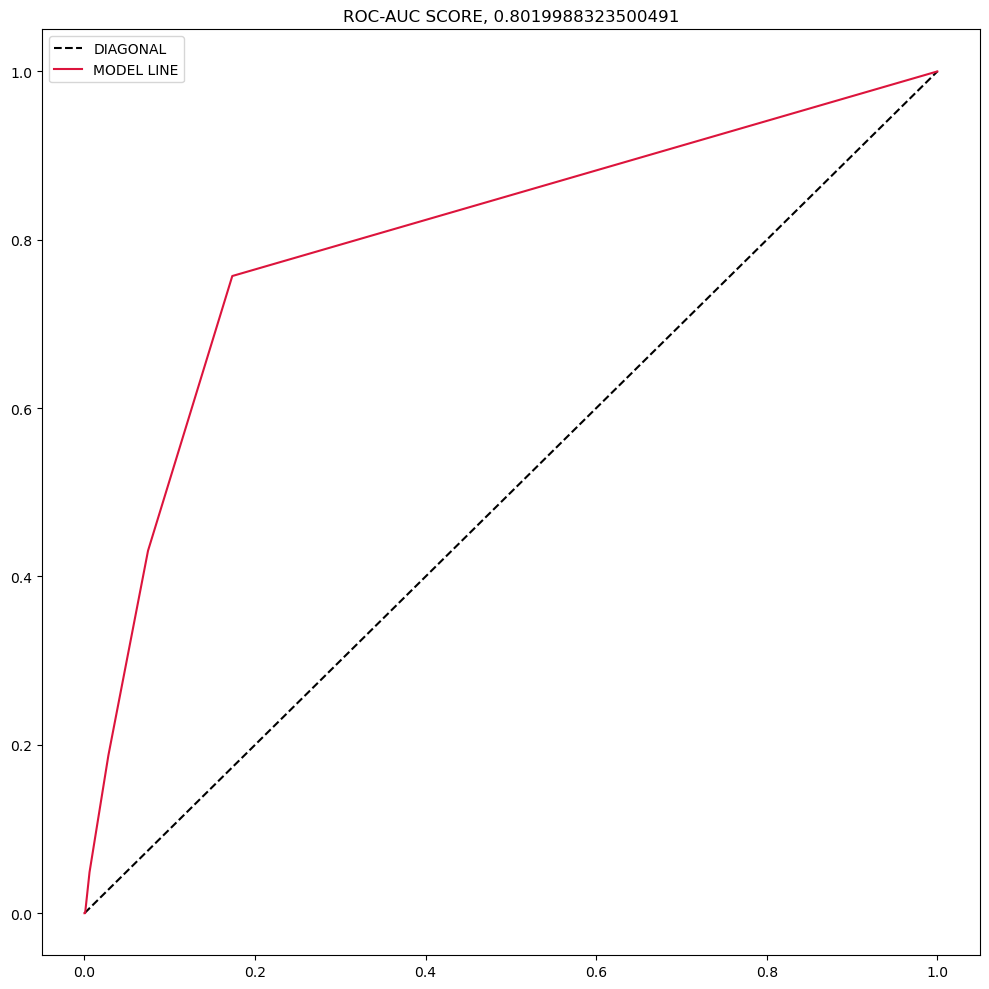

In [43]:
model_validation(KNeighborsClassifier(), x_train, y_train, x_test, y_test)

In [44]:
scoreline

,MODEL,ACCURACY,PRECISION,RECALL,F1 SCORE,COHEN KAPPA SCORE
0,LogisticRegression(),0.943333,0.780952,0.569444,0.658635,0.628561
1,DecisionTreeClassifier(class_weight='balanced'),0.980667,0.925926,0.868056,0.896057,0.885412
2,KNeighborsClassifier(),0.896667,0.415385,0.187500,0.258373,0.211276


confusion_matrix 
 [[1252  104]
 [  53   91]]
cohen_kappa_score 
 0.48
classification_report 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      1356
           1       0.47      0.63      0.54       144

    accuracy                           0.90      1500
   macro avg       0.71      0.78      0.74      1500
weighted avg       0.91      0.90      0.90      1500



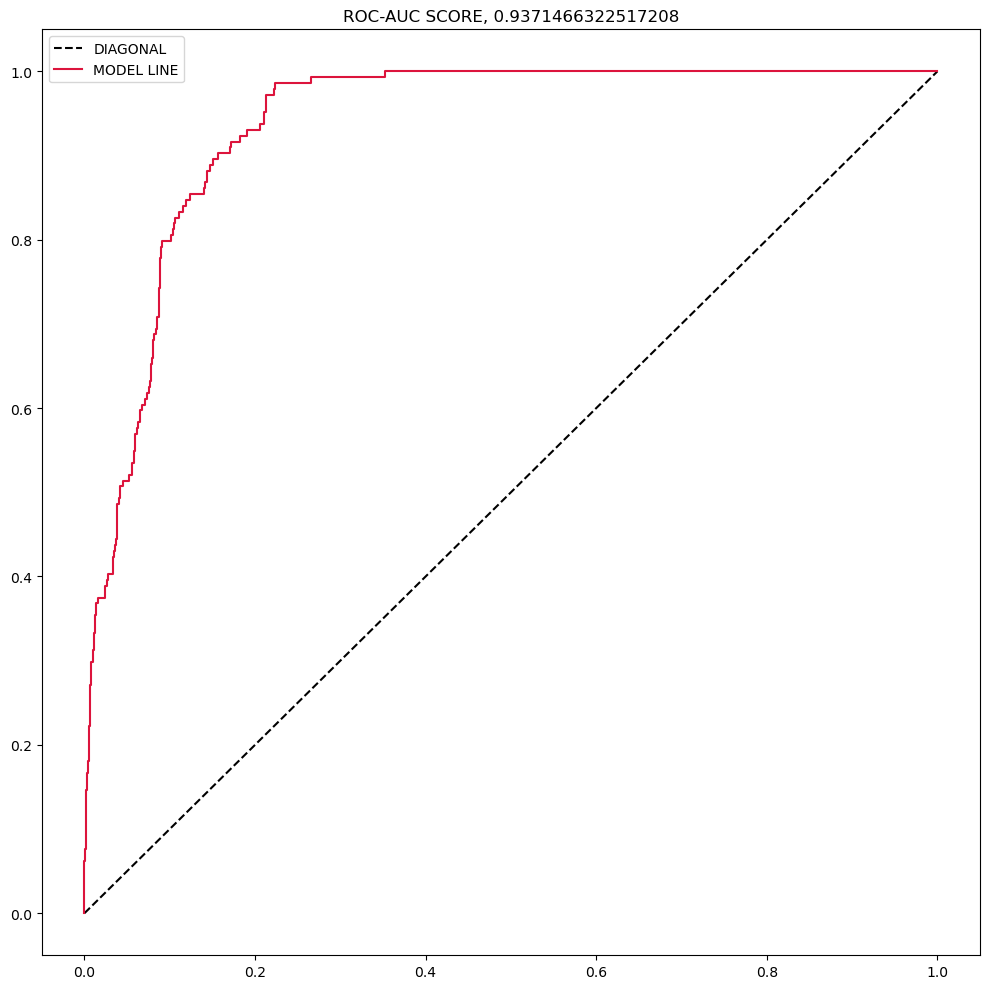

In [45]:
model_validation(GaussianNB(), x_train, y_train, x_test, y_test)

confusion_matrix 
 [[1346   10]
 [ 135    9]]
cohen_kappa_score 
 0.09
classification_report 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1356
           1       0.47      0.06      0.11       144

    accuracy                           0.90      1500
   macro avg       0.69      0.53      0.53      1500
weighted avg       0.87      0.90      0.87      1500



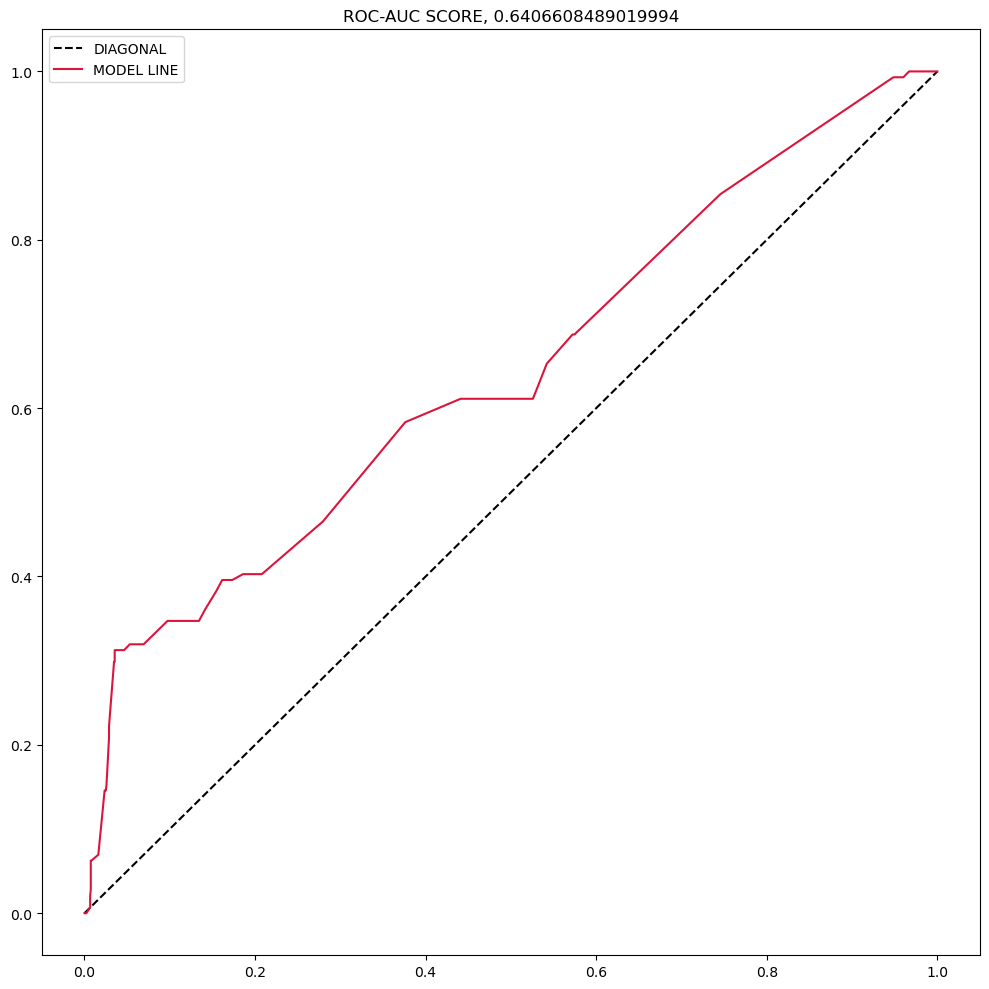

In [46]:
model_validation(BernoulliNB(), x_train, y_train, x_test, y_test)

confusion_matrix 
 [[1343   13]
 [  16  128]]
cohen_kappa_score 
 0.89
classification_report 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.91      0.89      0.90       144

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500



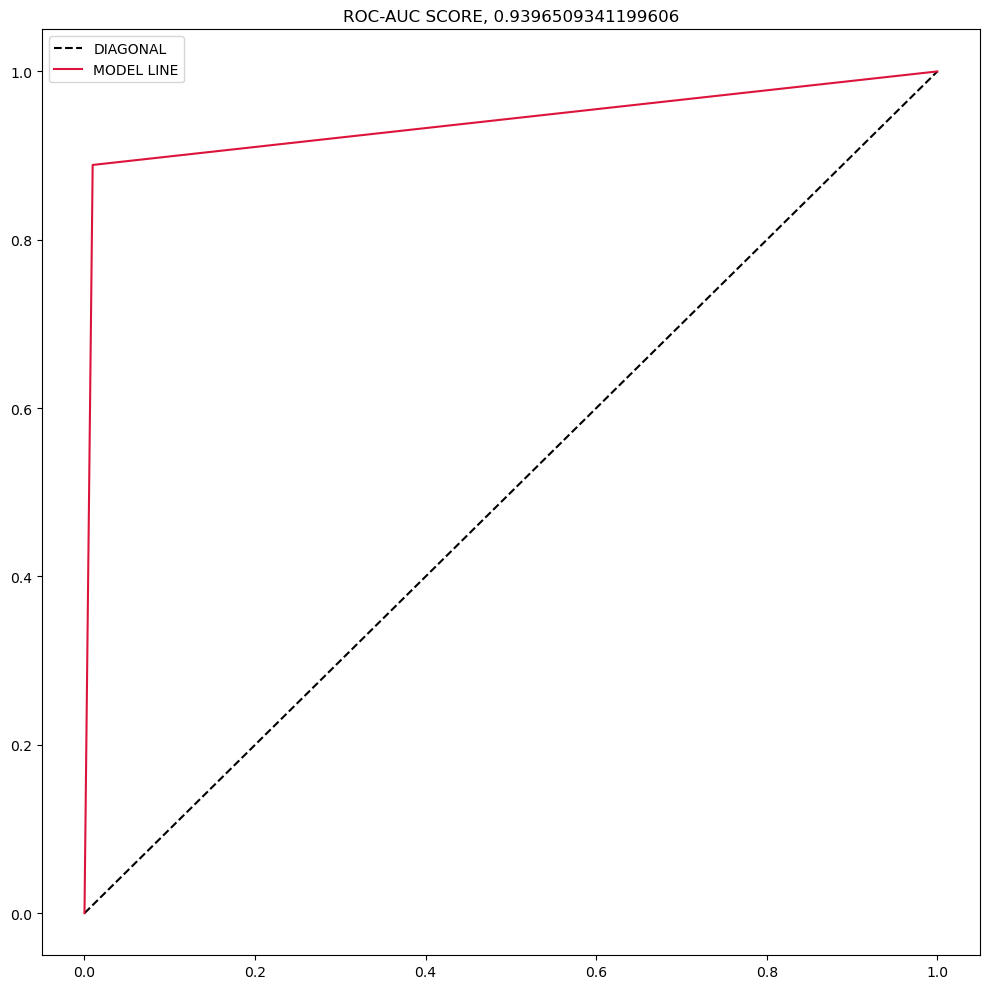

In [47]:
model_validation(DecisionTreeClassifier(), x_train, y_train, x_test, y_test)

confusion_matrix 
 [[1348    8]
 [  15  129]]
cohen_kappa_score 
 0.91
classification_report 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.94      0.90      0.92       144

    accuracy                           0.98      1500
   macro avg       0.97      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



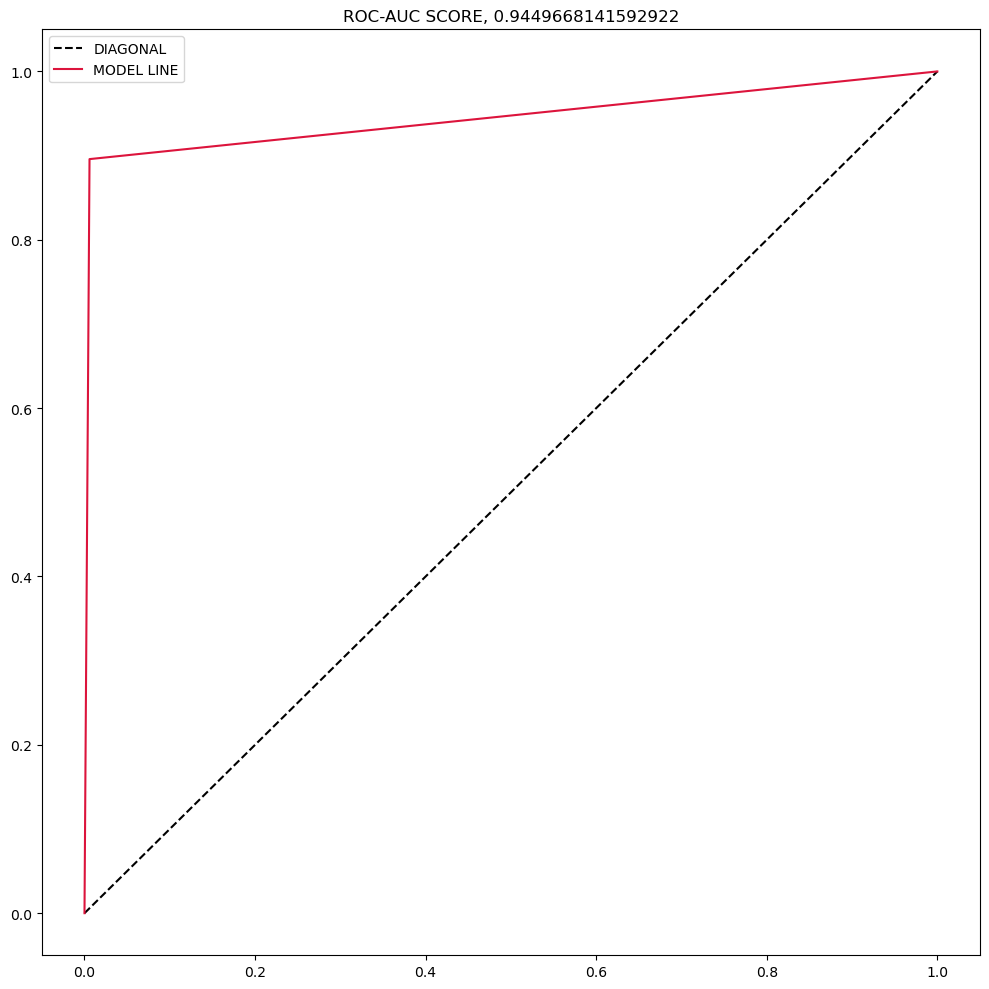

In [48]:
model_validation(DecisionTreeClassifier(criterion = 'entropy'), x_train, y_train, x_test, y_test)

In [49]:
scoreline

,MODEL,ACCURACY,PRECISION,RECALL,F1 SCORE,COHEN KAPPA SCORE
0,LogisticRegression(),0.943333,0.780952,0.569444,0.658635,0.628561
1,DecisionTreeClassifier(class_weight='balanced'),0.980667,0.925926,0.868056,0.896057,0.885412
2,KNeighborsClassifier(),0.896667,0.415385,0.187500,0.258373,0.211276
3,GaussianNB(),0.895333,0.466667,0.631944,0.536873,0.479374
4,BernoulliNB(),0.903333,0.473684,0.062500,0.110429,0.090065
5,DecisionTreeClassifier(),0.980667,0.907801,0.888889,0.898246,0.887566
6,DecisionTreeClassifier(criterion='entropy'),0.984667,0.941606,0.895833,0.918149,0.909696


confusion_matrix 
 [[1355    1]
 [  22  122]]
cohen_kappa_score 
 0.91
classification_report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1356
           1       0.99      0.85      0.91       144

    accuracy                           0.98      1500
   macro avg       0.99      0.92      0.95      1500
weighted avg       0.98      0.98      0.98      1500



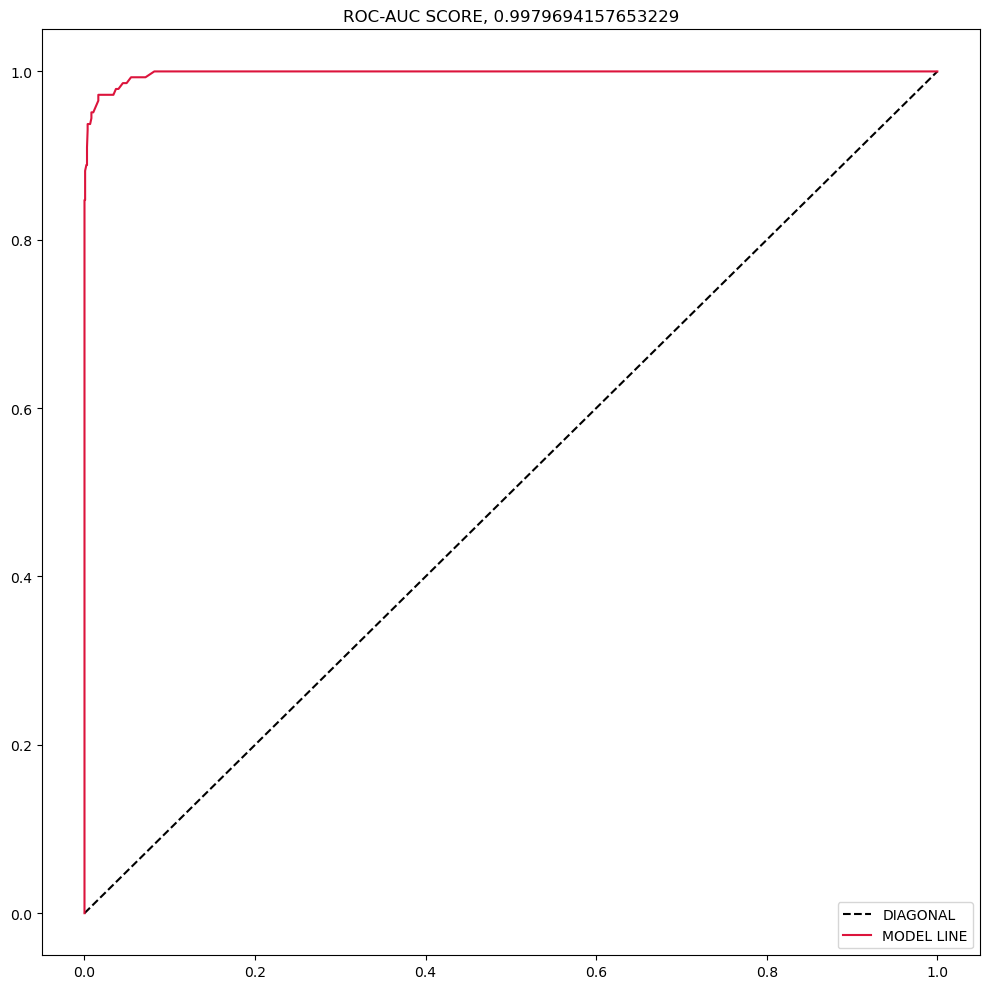

In [50]:
model_validation(RandomForestClassifier(), x_train, y_train, x_test, y_test)

confusion_matrix 
 [[1353    3]
 [  20  124]]
cohen_kappa_score 
 0.91
classification_report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.86      0.92       144

    accuracy                           0.98      1500
   macro avg       0.98      0.93      0.95      1500
weighted avg       0.98      0.98      0.98      1500



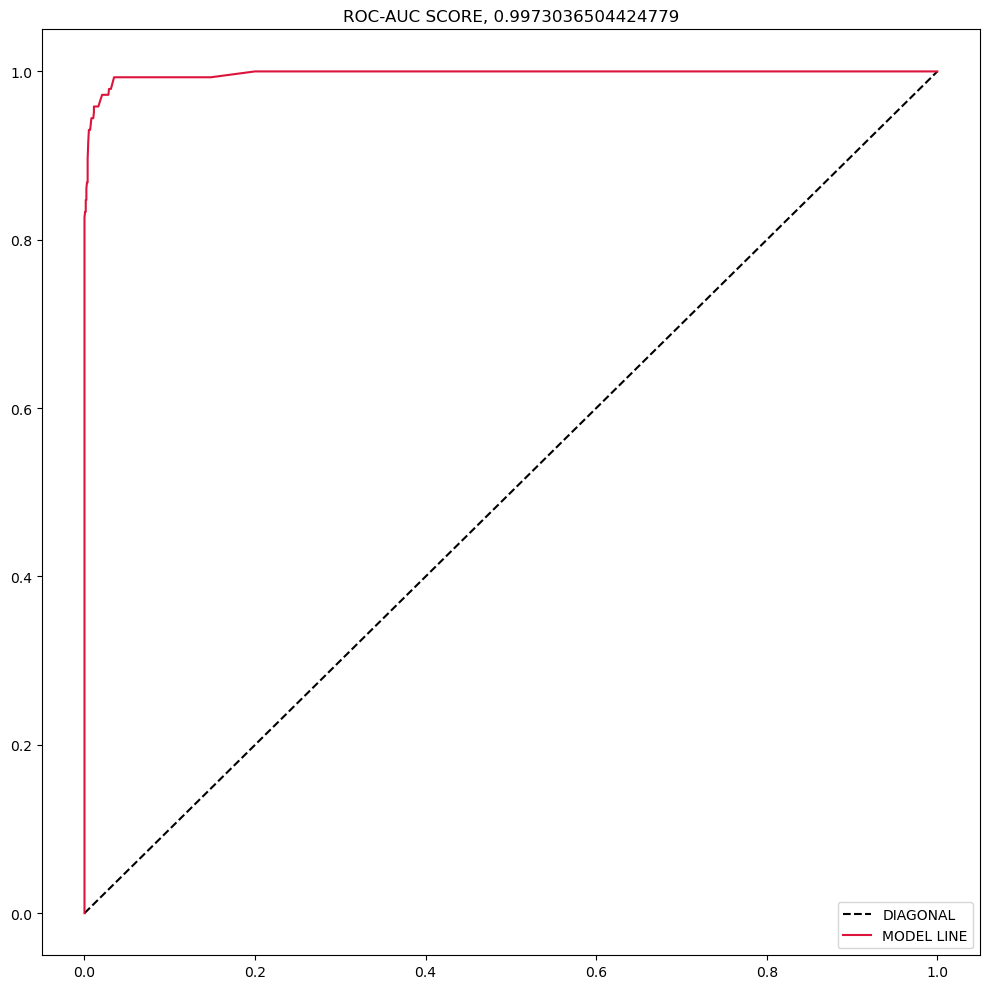

In [51]:
model_validation(RandomForestClassifier(criterion = 'entropy'), x_train, y_train, x_test, y_test)

In [52]:
scoreline

,MODEL,ACCURACY,PRECISION,RECALL,F1 SCORE,COHEN KAPPA SCORE
0,LogisticRegression(),0.943333,0.780952,0.569444,0.658635,0.628561
1,DecisionTreeClassifier(class_weight='balanced'),0.980667,0.925926,0.868056,0.896057,0.885412
2,KNeighborsClassifier(),0.896667,0.415385,0.187500,0.258373,0.211276
3,GaussianNB(),0.895333,0.466667,0.631944,0.536873,0.479374
4,BernoulliNB(),0.903333,0.473684,0.062500,0.110429,0.090065
5,DecisionTreeClassifier(),0.980667,0.907801,0.888889,0.898246,0.887566
6,DecisionTreeClassifier(criterion='entropy'),0.984667,0.941606,0.895833,0.918149,0.909696
7,RandomForestClassifier(),0.984667,0.991870,0.847222,0.913858,0.905499
8,RandomForestClassifier(criterion='entropy'),0.984667,0.976378,0.861111,0.915129,0.906738


confusion_matrix 
 [[1352    4]
 [  16  128]]
cohen_kappa_score 
 0.92
classification_report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.97      0.89      0.93       144

    accuracy                           0.99      1500
   macro avg       0.98      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500



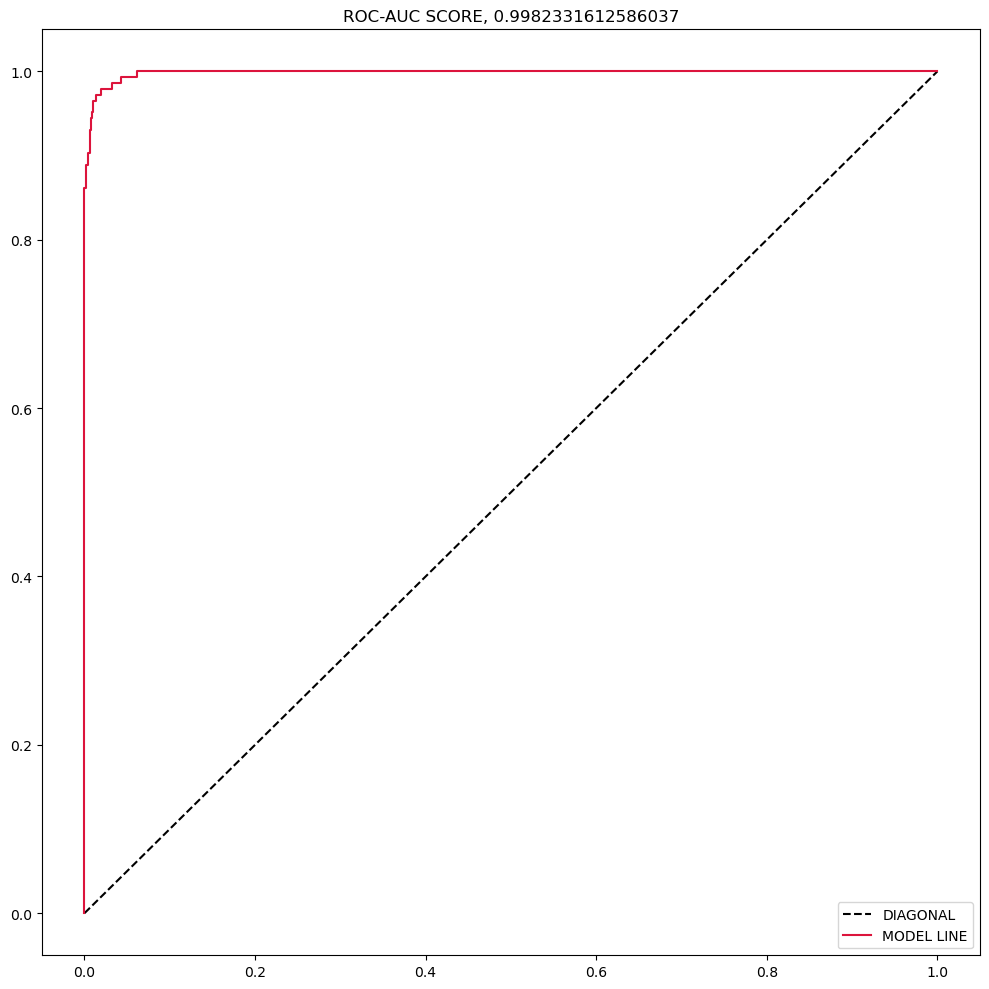

In [54]:
model_validation(GradientBoostingClassifier(),x_train, y_train, x_test, y_test )

confusion_matrix 
 [[1350    6]
 [  16  128]]
cohen_kappa_score 
 0.91
classification_report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.96      0.89      0.92       144

    accuracy                           0.99      1500
   macro avg       0.97      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500



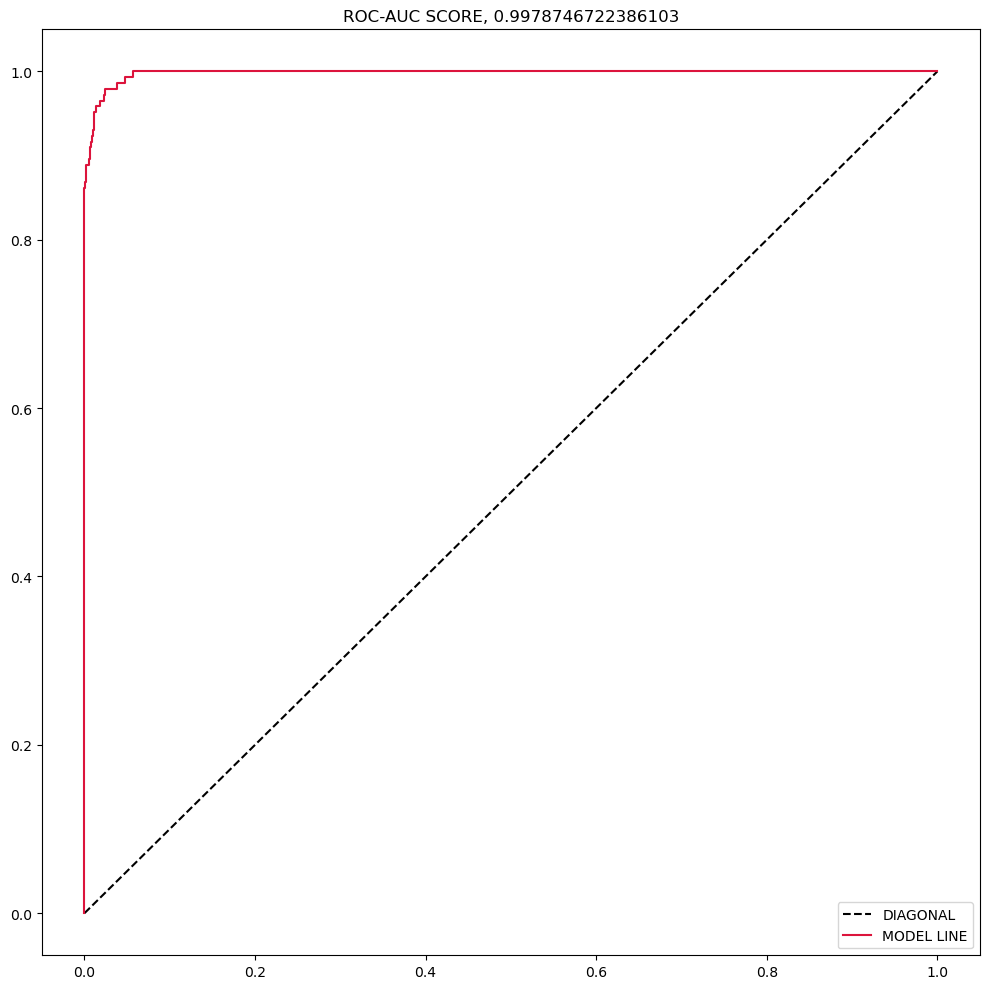

In [55]:
model_validation(XGBClassifier(), x_train, y_train, x_test, y_test)

confusion_matrix 
 [[1352    4]
 [  17  127]]
cohen_kappa_score 
 0.92
classification_report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.97      0.88      0.92       144

    accuracy                           0.99      1500
   macro avg       0.98      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500



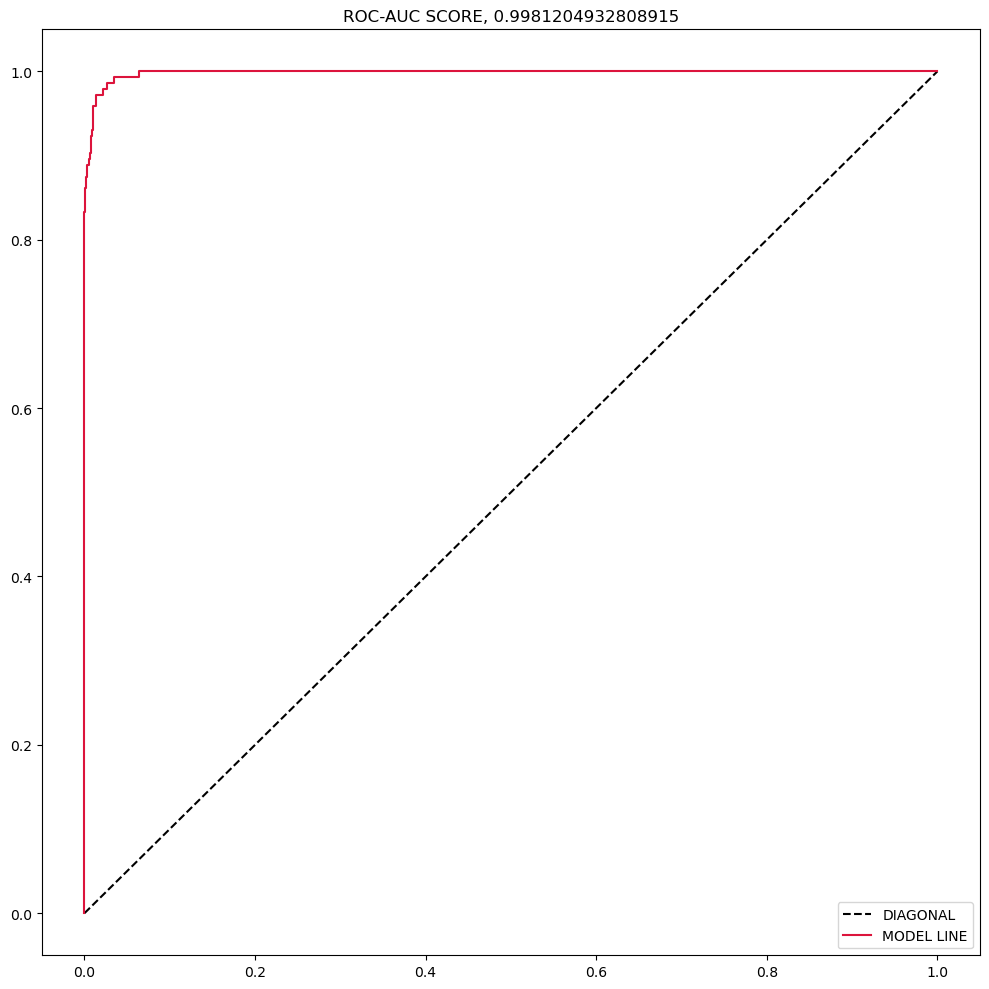

In [56]:
model_validation(LGBMClassifier(), x_train, y_train, x_test, y_test)


Learning rate set to 0.017589
0:	learn: 0.6450735	total: 158ms	remaining: 2m 37s
1:	learn: 0.6045352	total: 161ms	remaining: 1m 20s
2:	learn: 0.5692683	total: 165ms	remaining: 54.7s
3:	learn: 0.5306215	total: 168ms	remaining: 41.8s
4:	learn: 0.4995123	total: 171ms	remaining: 34.1s
5:	learn: 0.4671439	total: 175ms	remaining: 28.9s
6:	learn: 0.4479323	total: 177ms	remaining: 25.1s
7:	learn: 0.4278478	total: 180ms	remaining: 22.4s
8:	learn: 0.4071678	total: 184ms	remaining: 20.2s
9:	learn: 0.3883117	total: 187ms	remaining: 18.5s
10:	learn: 0.3713373	total: 191ms	remaining: 17.1s
11:	learn: 0.3503831	total: 194ms	remaining: 16s
12:	learn: 0.3365890	total: 199ms	remaining: 15.1s
13:	learn: 0.3175145	total: 203ms	remaining: 14.3s
14:	learn: 0.2979429	total: 207ms	remaining: 13.6s
15:	learn: 0.2787101	total: 211ms	remaining: 13s
16:	learn: 0.2689927	total: 215ms	remaining: 12.4s
17:	learn: 0.2587520	total: 219ms	remaining: 11.9s
18:	learn: 0.2491913	total: 222ms	remaining: 11.5s
19:	learn: 0.

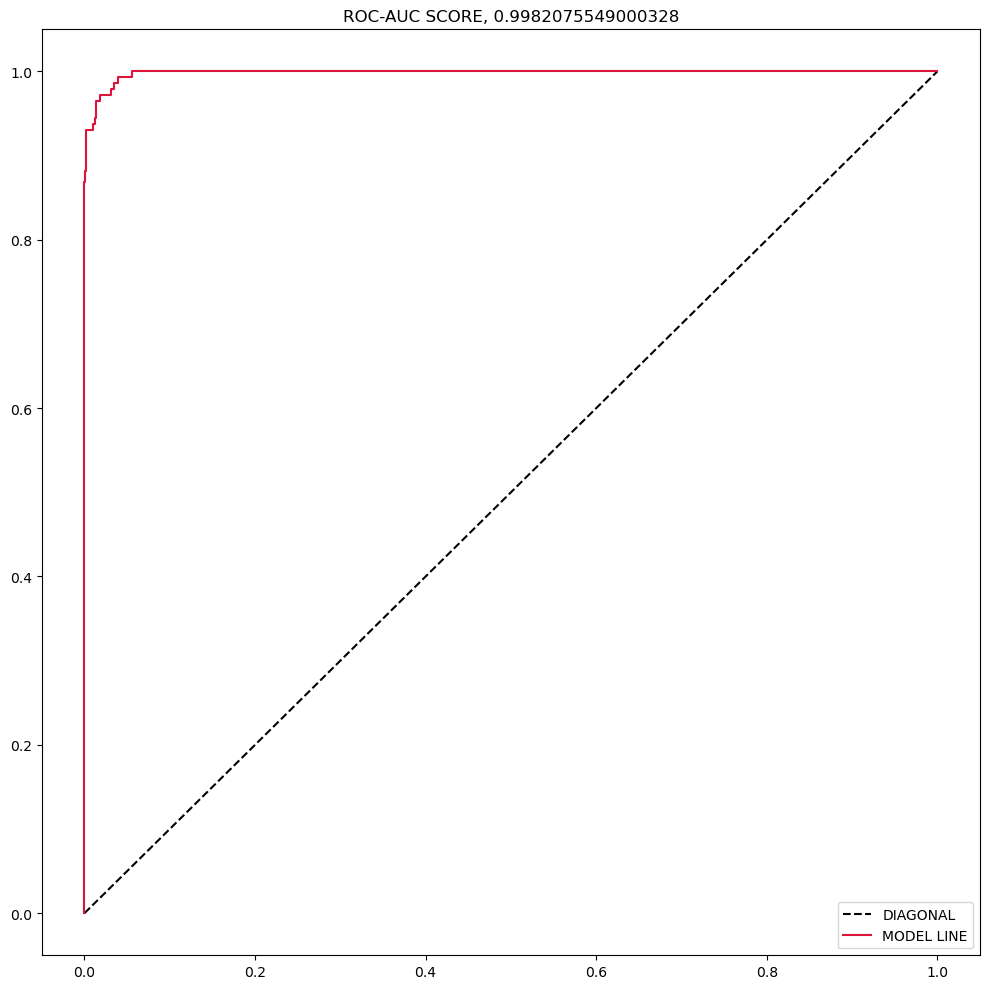

In [57]:
model_validation(CatBoostClassifier(), x_train,y_train, x_test, y_test)

In [58]:
scoreline

,MODEL,ACCURACY,PRECISION,RECALL,F1 SCORE,COHEN KAPPA SCORE
0,LogisticRegression(),0.943333,0.780952,0.569444,0.658635,0.628561
1,DecisionTreeClassifier(class_weight='balanced'),0.980667,0.925926,0.868056,0.896057,0.885412
2,KNeighborsClassifier(),0.896667,0.415385,0.187500,0.258373,0.211276
3,GaussianNB(),0.895333,0.466667,0.631944,0.536873,0.479374
4,BernoulliNB(),0.903333,0.473684,0.062500,0.110429,0.090065
5,DecisionTreeClassifier(),0.980667,0.907801,0.888889,0.898246,0.887566
6,DecisionTreeClassifier(criterion='entropy'),0.984667,0.941606,0.895833,0.918149,0.909696
7,RandomForestClassifier(),0.984667,0.991870,0.847222,0.913858,0.905499
8,RandomForestClassifier(criterion='entropy'),0.984667,0.976378,0.861111,0.915129,0.906738
9,GradientBoostingClassifier(),0.986667,0.969697,0.888889,0.927536,0.920209


## **HyperParameter Tuning**

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
grid = {'learning_rate' : [0.1,0.5,0.2], 'max_depth' : [2,5,10], 'n_estimators' : [100,200,500], 'alpha' : [0,1,1.5,2,2.5], 'lambda' : [0,1,1.5,2,2.5]}

In [61]:
gscv = GridSearchCV(estimator=XGBClassifier(random_state = 2), cv = 5, verbose= 3, scoring = 'f1', param_grid=grid)

In [62]:
gscv.fit(x_train, y_train)

Fitting 5 folds for each of 675 candidates, totalling 3375 fits
[CV 1/5] END alpha=0, lambda=0, learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.930 total time=   0.1s
[CV 2/5] END alpha=0, lambda=0, learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.916 total time=   0.0s
[CV 3/5] END alpha=0, lambda=0, learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.946 total time=   0.0s
[CV 4/5] END alpha=0, lambda=0, learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.860 total time=   0.0s
[CV 5/5] END alpha=0, lambda=0, learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.947 total time=   0.0s
[CV 1/5] END alpha=0, lambda=0, learning_rate=0.1, max_depth=2, n_estimators=200;, score=0.931 total time=   0.1s
[CV 2/5] END alpha=0, lambda=0, learning_rate=0.1, max_depth=2, n_estimators=200;, score=0.931 total time=   0.1s
[CV 3/5] END alpha=0, lambda=0, learning_rate=0.1, max_depth=2, n_estimators=200;, score=0.938 total time=   0.1s
[CV 4/5] END alpha=0, la

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=2, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'alpha': [0, 1, 1.5, 2, 2.5],
                         'lambda': [0, 1, 1.5, 2, 2.5],
                         'learning_rate': [0.1, 0.5, 0.2],
                         'max_depth': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='f1', verbose=3)

In [63]:
gscv.best_params_

{'alpha': 1,
 'lambda': 1.5,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 200}

In [64]:
gscv.best_score_

0.939446671647406

In [65]:
final_model = XGBClassifier(random_state = 2, **gscv.best_params_)
final_model.fit(x_train, y_train)

XGBClassifier(alpha=1, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', lambda=1.5,
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=2, ...)

AS MODEL HAS SMALL SAMPLE SIZE SO OVERFITTING CAN'T BE COUNTERRED PROPERLY WE NEED MORE SAMPLE SIZE AND WITH THIS SAMPLE SIZE THIS IS THE BEST TUNED MODEL THAT WE HAVE CREATED

# **------Now This Model is ready for deployment ------**

In [68]:
pd.DataFrame({'Columns' : x_train.columns, 'Score' : final_model.feature_importances_, 'Percentage' : final_model.feature_importances_*100}).sort_values(by = 'Percentage', 
                                                                                                                                                         ascending=False)

,Columns,Score,Percentage
6,Education,0.442749,44.274887
2,Income,0.223007,22.300737
4,Family,0.174845,17.484509
5,CCAvg,0.047110,4.710991
9,CD Account,0.041169,4.116916
0,Age,0.021787,2.178683
8,Securities Account,0.010865,1.086471
1,Experience,0.010835,1.083513
10,Online,0.009947,0.994729
7,Mortgage,0.006930,0.693019
